In [ ]:
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 이미지 파일의 크기
width = 28
height = 28

In [ ]:
# 1. 데이터세트 생성

# 훈련 데이터세트와 시험 데이터세트 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("훈련 데이터(x): ", x_train.shape, x_train.dtype)
print("훈련 데이터(y): ", y_train.shape, y_train.dtype)
print("시험 데이터(x): ", x_test.shape, x_test.dtype)
print("시험 데이터(y): ", y_test.shape, y_test.dtype)

11501568/11490434 [==============================] - 0s 0us/step
훈련 데이터(x):  (60000, 28, 28) uint8
훈련 데이터(y):  (60000,) uint8
시험 데이터(x):  (10000, 28, 28) uint8
시험 데이터(y):  (10000,) uint8


In [ ]:
# 입력(x) 데이터 shape 변경: (28, 28) -> (784)
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [ ]:
print("훈련 데이터(x): ", x_train.shape, x_train.dtype)
print("훈련 데이터(y): ", y_train.shape, y_train.dtype)
print("시험 데이터(x): ", x_test.shape, x_test.dtype)
print("시험 데이터(y): ", y_test.shape, y_test.dtype)

훈련 데이터(x):  (60000, 784) float32
훈련 데이터(y):  (60000,) uint8
시험 데이터(x):  (10000, 784) float32
시험 데이터(y):  (10000,) uint8


In [ ]:
# 훈련 데이터세트와 검증 데이터세트 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]


In [ ]:
# 정답 레이블: one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [ ]:
# 데이터세트 shape, dtype 확인
print("훈련 데이터(x): ", x_train.shape, x_train.dtype)
print("훈련 데이터(y): ", y_train.shape, y_train.dtype)
print("검증 데이터(x): ", x_val.shape, x_val.dtype)
print("검증 데이터(y): ", y_val.shape, y_val.dtype)
print("시험 데이터(x): ", x_test.shape, x_test.dtype)
print("시험 데이터(y): ", y_test.shape, y_test.dtype)

훈련 데이터(x):  (50000, 784) float32
훈련 데이터(y):  (50000, 10) float32
검증 데이터(x):  (10000, 784) float32
검증 데이터(y):  (10000, 10) float32
시험 데이터(x):  (10000, 784) float32
시험 데이터(y):  (10000, 10) float32


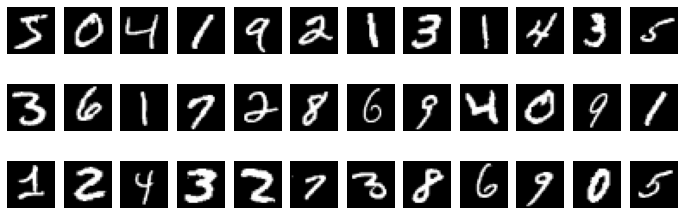

In [ ]:
# 훈련 데이터세트 확인해보기
plt.figure(figsize=(12, 4))

for i in range(36):
  plt.subplot(3, 12, i+1)
  plt.imshow(x_train[i].reshape(width, height), cmap='gray')
  plt.axis("off")

plt.show()

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation ='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

# 만들어진 모델 내부 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 10s 5ms/step - loss: 0.2258 - accuracy: 0.9303 - val_loss: 0.1362 - val_accuracy: 0.9602
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0992 - accuracy: 0.9691 - val_loss: 0.1115 - val_accuracy: 0.9677
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0714 - accuracy: 0.9779 - val_loss: 0.0926 - val_accuracy: 0.9722
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0962 - val_accuracy: 0.9738
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.0903 - val_accuracy: 0.9755
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.1309 - val_accuracy: 0.9637
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.1002 - val_accuracy

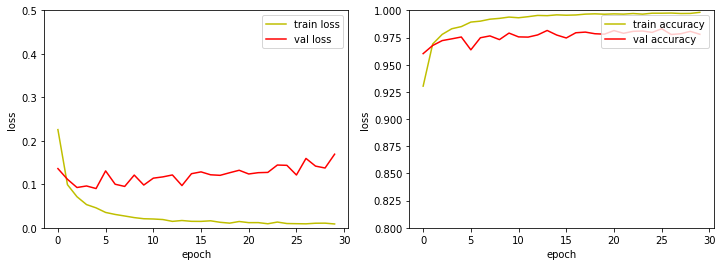

In [ ]:
# 5. 학습과정 살펴보기
plt.figure(figsize=(12,4))

# 에러값(loss) 그래프
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
plt.ylim([0.0, 0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

# 정확도(accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'y', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r', label='val accuracy')
plt.ylim([0.8, 1.0])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# 6. 모델 평가하기
loss_acc = model.evaluate(x_test, y_test)
print(loss_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1667 - accuracy: 0.9767
[0.16666081547737122, 0.9767000079154968]


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
model.save('/gdrive/My Drive/Colab Notebooks/10주차/mnist.model.h5')